> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Economic Growth)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

For this project, I have spent about four hours thinking about questions, and about how I can visualize the date.  
My primary question is about Economic Growth. I have two main questions: 1) Is democracy good for business (Economic Growth) 2) What is more  important for Economic Growth: democracy or aid? 

I went to http://www.gapminder.org/data/  and looked over the data sets. I looked at data sets for: HIV prevalence, aid, first marriage, GDP per capita, cell phone, democracy, transparency international, human development index.  I will use aid, GDP per capita, democracy, transparency international, human development index data sets. 

I expect in the data wrangling process, that I will need to eliminate null values. When looking at the available data, it looks like the base year of analysis will be 2010.  In the data wrangling and exploration process, this will reduce the amount of countries being analyzed.  I also have this suspicion that country names in the data sets could be different for the same country.  For this, I will need to decide what is the Economic Grow country name and make changes to the relevant Data Frames. For the aid question, it will be interesting to know which countries did not have enough data for analysis.   I expect that data wrangling and exploration will be an iterative process. 

In the exploration process, I will use a combination of statistics and visualizations. I will use the Data Frame Describe functions, to find out the min, 25%, 50%, 75%, and max values for the selected data sets.  I will then for aid, GDP per capita, democracy, transparency international, and human development indexes put each country into 4 groups based on the Describe functions.  The groups will be from min to 25%, more than 25% to 50%, more than 50% to 75%, and more than 75%. Group ‘1’will be the best and Group ‘4’ will be the least.  How to classify from best to least will be dependent upon the data set.  In the data exploration process, I want to ask the following questions and look at the answers using visualizations: Do democracy and transparency correlate? Can I make a democracy/transparency index? Do the GDP per capita and Human Development Index correlate? How do democracy/transparency and GDP per capita/Human Development Index correlate? For the countries receiving aid: 1) What is the correlation between aid per capita and GDP per capita/Human Development Index? 2)   What is correlation between democracy/transparency and GDP per capita/Human Development Index. 

In the conclusion phase, based upon Exploratory Data Analysis, I will show visualizations for: 1) Is democracy good for business (Economic Growth) 2) What is more  important for Economic Growth: democracy or aid? 


In [1677]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

#reading in the files and first analysis 

aid = 'C:/Users/Kims/Documents/Data_Analysis_2017/gapminder/aid_per_person.csv'
democracy = 'C:/Users/Kims/Documents/Data_Analysis_2017/gapminder/democracy_score.csv'
gdp = 'C:/Users/Kims/Documents/Data_Analysis_2017/gapminder/gdp_ppp.csv'
hdi = 'C:/Users/Kims/Documents/Data_Analysis_2017/gapminder/hdi.csv'
ti_cpi = 'C:/Users/Kims/Documents/Data_Analysis_2017/gapminder/ti_cpi.csv'


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

I used the "indicator_aid received per person" Excel and renamed it to 'aid'.  


Net official development assistance (ODA) per capita consists of disbursements of loans made on concessional terms (net of repayments of principal) and grants by official agencies of the members of the Development Assistance Committee (DAC), by multilateral institutions, and by non-DAC countries to promote economic development and welfare in countries and territories in the DAC list of ODA recipients; and is calculated by dividing net ODA received by the midyear population estimate. It includes loans with a grant element of at least 25 percent (calculated at a rate of discount of 10 percent).

In simple English - how much a person received in a country received aid in 2010 dollars. 



In [1678]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# My regional settings use ';' as the comma seperator 
# I went to https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python 
# to get the encoding parameter

aid_df = pd.read_csv(aid,sep=';',encoding = "ISO-8859-1") 

aid_df.head()

,Aid received per person (current US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1.776437,3.516253,1.683492,3.573637,4.407678,5.041137,4.608462,3.636801,2.562435,...,15.370768,47.687783,56.401679,79.518324,94.887932,96.309269,157.005494,149.920708,186.470442,186.894497
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.259349,99.495821,114.108181,95.988270,101.578713,101.938569,96.997632,114.185686,111.804250,106.326405
4,Algeria,32.875009,39.785973,35.471498,24.683813,19.548851,12.264529,10.377884,8.561455,9.239531,...,6.412711,6.041630,7.461428,9.760450,10.538959,7.184665,11.629003,9.441435,9.116980,5.591486


I used the "indicatorpolityiv" Excel and renamed it 'democracy_score'.

Overall polity score from the Polity IV dataset, calculated by subtracting an autocracy score from a democracy score. It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.

There could be nuances to look at in Data Cleaning, but this description seems to be pretty straight forward 



In [1679]:
# My regional settings use ';' as the comma seperator 
# I went to https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python 
# to get the encoding parametere 


democracy_df = pd.read_csv(democracy,sep=';',encoding = "ISO-8859-1") 

democracy_df.head()

,"Democracy, based on PolityIV",1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


I used the "indicator WB data GDP pc ppp" Excel and renamed it 'gdp_ppp'.

GDP per capita, by Purchasing Power Parities and adjusted for inflation. 2005 international dollars. 

In simple English, McDonalds Big Macs cost differently in different countries. This Excel contains in 2005 dollars how many Big Macs you could buy in your own country - this means that some countries have a higher GPD Purchasing Power Parity then their nominal GDP and also the oppositie. 




In [1680]:
# My regional settings use ';' as the comma seperator 
# I went to https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python 
# to get the encoding parametere 


gdp_df = pd.read_csv(gdp,sep=';',encoding = "ISO-8859-1") 

gdp_df.head()

,"GDP per capity, 2005 ppp, WB data",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,568.551946,631.782712,672.079195,748.112813,808.902073,874.197993,879.032676,1029.215154,1082.949267,NaN
1,Albania,4241.822480,4397.101349,4441.090088,4404.391583,4260.021529,4238.547755,4365.299637,4216.080841,4053.640737,...,5253.756466,5522.970763,5814.835828,6101.576853,6376.603379,6725.003521,7216.119498,7427.807916,7660.043814,7861.131481
2,Algeria,6358.196927,6336.322495,6522.698293,6654.029143,6806.901254,6846.265732,6675.716338,6446.264094,6212.727651,...,6344.119808,6681.642459,6924.379244,7168.564544,7201.681842,7305.142336,7367.171813,7431.280165,7564.391141,7643.171434
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I used the "Indicator_HDI" Excel and renamed it 'hdi'.

Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level and living standard.

In simple English, how well are we living.  A higher score is better. P.S. it would have been interesting to look at happiness, but gapminder did not have such a data set. 

In [1681]:
# My regional settings use ';' as the comma seperator 
# I went to https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python 
# to get the encoding parametere 


hdi_df = pd.read_csv(hdi,sep=';',encoding = "ISO-8859-1") 

hdi_df.head()

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
4,Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


I used the "indicator ti cpi 2009" Excel and renamed it 'ti_cpi'

For the purpose of the CPI, how is corruption defined?

The CPI focuses on corruption in the public sector. The surveys used in compiling the CPI ask questions relating to the abuse of public power for private benefit. These include questions on: bribery of public officials, kickbacks in public procurement, embezzlement of public funds, and questions that probe the strength and effectiveness of public sector anti-corruption efforts, thereby covering both the administrative and political aspects of corruption.
Why is the CPI based only on perceptions?

It is difficult to assess the overall levels of corruption in different countries/territories based on hard empirical data, e.g. by comparing the amount of bribes or the number of prosecutions or court cases directly related to corruption. In the latter case, for example, such data does not reflect actual levels of corruption; rather it highlights the extent to which prosecutors, courts and/or the media are effectively investigating and exposing corruption. One reliable method of compiling cross-country data is, therefore, to draw on the experience and perceptions of those who see first hand the realities of corruption in a country.

In simple english, a higher score means less corruptation while a lower score means more corruption. 

In [1682]:
# My regional settings use ';' as the comma seperator 
# I went to https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python 
# to get the encoding parametere 


ti_cpi_df = pd.read_csv(ti_cpi,sep=';',encoding = "ISO-8859-1") 

ti_cpi_df.head()

,country,2008,2009,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,New Zealand,9.4,9.3,NaN,NaN,NaN
1,Denmark,9.3,9.3,NaN,NaN,NaN
2,Sweden,9.2,9.2,NaN,NaN,NaN
3,Singapore,9.2,9.3,NaN,NaN,NaN
4,Switzerland,9.0,8.7,NaN,NaN,NaN


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [1683]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [1684]:

# make a new gdp_df with only the fields I want for analysis

# 1) make a common country column 
gdp_df['country'] = gdp_df['GDP per capity, 2005 ppp, WB data']
gdp_df.head()
# 2) make a new dataframe
new_gdp_df =  gdp_df[['country','1990','2010']]
# 3) check for duplicates 
print('duplicated', sum(new_gdp_df.duplicated()))
# 4) check for nulls and remove nulls, this is good for python but also for analysis, I do not want to analyze incomplete
# data 
print('look at nulls',new_gdp_df.info()) 
pd.isnull(new_gdp_df[['1990','2010']])
#new_gdp_df = new_gdp_df[new_gdp_df['1990'].notnull()] # many new countries appeared after 1990, I will drop null 
#when I use this column for analysis, for my democracy and business question I want 2010 data 
new_gdp_df = new_gdp_df[new_gdp_df['2010'].notnull()] # drop rows that have null
print('after nulls removed',new_gdp_df.info())
# 5) check for uniqueness
print('uniqueness',new_gdp_df.nunique())

# 6) put gdp as the prefix
new_gdp_df.rename(columns={'country': 'gdp_country','1990': 'gdp_1990','2010': 'gdp_2010'},inplace=True)
print('new column names',new_gdp_df.head())
# 7) take a look at descriptive statistics 
print(new_gdp_df.describe())









duplicated 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
country    260 non-null object
1990       166 non-null float64
2010       178 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.2+ KB
look at nulls None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 209
Data columns (total 3 columns):
country    178 non-null object
1990       163 non-null float64
2010       178 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB
after nulls removed None
uniqueness country    178
1990       163
2010       178
dtype: int64
new column names            gdp_country      gdp_1990      gdp_2010
0          Afghanistan           NaN   1082.949267
1              Albania   3910.217793   7660.043814
2              Algeria   6211.339788   7564.391141
5               Angola   3093.463622   5171.713948
6  Antigua and Barbuda  14939.749680  14904.488390
           gdp_1990      gdp_2010
count    163.00

From the Udacity data analysis lectures and exercises, I learned best practices for data cleaning.  These are the steps that I take for the date cleaning.  Also in the data cleaning process, I am making a new dataframe for further analysis. I have some prints to confirm that the operations have been successful.  

#1) make a common country column - different data sets have different country column names and also country names - we can fix the columns now but not the rows  
#2) make a new dataframe
#3) check for duplicates 
#4) check for nulls and remove nulls,  I do not want to analyze incomplete data - for gdp I did keep countries 
with null in 1990 because many new countries have appeared since 1990 - I will need to remember this in further 
analysis 
#5) check for uniqueness
#6) put gdp as the prefix - I will merge dataframes so I want to be able to identify from which dataframe I got data
#7) take a look at descriptive statistics - first data exploration - but I also want to assign a ranking based upon the describe function  


In [1685]:
# I make a new column 'gdp_rank' so that I can put in the countries ranking based on the median 
# I understood that I need to add the '.copy() from 
# https://stackoverflow.com/questions/42438987/dealing-with-settingwithcopywarning-when-assigning-columns-in-pandas
# I use a query to assign a rank of 4 to the countries with the lowest gdp 
rank_4 = new_gdp_df[(new_gdp_df['gdp_2010'] <= 2420.474253) & (new_gdp_df['gdp_2010'] >= 0) ].copy()
rank_4['gdp_rank'] = 4 
# I use a query to assign a rank of 3 to the countries with a GDP below the median
rank_3 = new_gdp_df[(new_gdp_df['gdp_2010'] >= 2420.474254) & (new_gdp_df['gdp_2010'] <= 7564.391141) ].copy()
rank_3['gdp_rank'] = 3 
# I use a query to assign a rank of 2 to the countries with a GDP above the median
rank_2 = new_gdp_df[(new_gdp_df['gdp_2010'] <= 18734.418610) & (new_gdp_df['gdp_2010'] >= 7564.391142) ].copy()
rank_2['gdp_rank'] = 2 
# I use a query to assign a rank 1 to the countries with the highest GDP
rank_1 = new_gdp_df[(new_gdp_df['gdp_2010'] <= 100000) & (new_gdp_df['gdp_2010'] >= 18734.418611) ].copy()
rank_1['gdp_rank'] = 1 
# I concat the rankings and assign them back to the new_gdp_df
new_gdp_df = pd.concat([rank_1, rank_2,rank_3,rank_4])
# a quick check to see if it looks ok 
# take a look at the info, the rank column should not have nulls 
print('with ranking',new_gdp_df.info())
# take a look at the statistics, should not have changed except for the ranking 
print('with ranking',new_gdp_df.describe())





<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 10 to 209
Data columns (total 4 columns):
gdp_country    178 non-null object
gdp_1990       163 non-null float64
gdp_2010       178 non-null float64
gdp_rank       178 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.0+ KB
with ranking None
with ranking            gdp_1990      gdp_2010   gdp_rank
count    163.000000    178.000000  178.00000
mean    9022.342655  12706.452753    2.52809
std    10721.408114  13987.932759    1.13087
min      355.408001    316.471524    1.00000
25%     1787.616165   2327.668953    2.00000
50%     4583.058443   7442.680281    3.00000
75%    12906.133895  17250.681895    4.00000
max    73501.526120  69797.940760    4.00000


 In the first 17 January review I received this comment "Required
As mentioned in the rubric above, you should not use loops when they can be replaced by vectorized operations.
Therefore, I'll ask you to try and remove the loops from your code using Pandas or NumPy functionalities. :)"
To be honest, I thought this only could be done with a for loop, but then I rethought about it over lunch.  If this logic is OK, then I will rewrite the rest of the four loops. You can evaluate other aspects of my work. 
 
 
 I make a new column 'gdp_rank' so that I can put in the countries ranking based on the median 
 I understood that I need to add the '.copy() from 
 https://stackoverflow.com/questions/42438987/dealing-with-settingwithcopywarning-when-assigning-columns-in-pandas

 I use a query to assign a rank of 4 to the countries with the lowest gdp 

 I use a query to assign a rank of 3 to the countries with a GDP below the median

 I use a query to assign a rank of 2 to the countries with a GDP above the median

 I use a query to assign a rank 1 to the countries with the highest GDP

 I concat the rankings and assign them back to the new_gdp_df
 I made rank1, rank2, rank3, and rank4 because I did not find a similar function in Pandas. I used concat 
 so that I could assign the rank to the relevant rows 


 I take a quick check to see if it looks ok - I used prints of the head and tail - checked to see if the ranking has 
 been assigned according to the query logic 
 
 I take a look at the df.info, the rank column should not have nulls 

 I take a look at the statistics, should not have changed except for the ranking 





In [1686]:

# 1) make a common country column 
hdi_df['country'] = hdi_df['HDI']
# 2) make a new dataframe
new_hdi_df =  hdi_df[['country','1990','2011']]
print('first',new_hdi_df.head())
# 3) check for duplicates 
print('duplicates',sum(new_hdi_df.duplicated()))
# 4) check for nulls and remove nulls, this is good for python but also for analysis, I do not want to analyze incomplete
# data 
print('look at nulls',new_hdi_df.info()) 
pd.isnull(new_hdi_df[['1990','2011']])
new_hdi_df = new_hdi_df[new_hdi_df['1990'].notnull()] # drop rows that have null 
new_hdi_df = new_hdi_df[new_hdi_df['2011'].notnull()] # drop rows that have null 
print('new_hdi_df.info',new_hdi_df.info()) # confirm that data types are float 
print('after nulls removed',new_hdi_df.head())
# 4) check for uniqueness, I did an excl pivot table on 2011, some of the value do repeat, I think the data is ok
print('uniqueness',new_hdi_df.nunique())
# 5) put hdi as the prefix
new_hdi_df.rename(columns={'country': 'hdi_country','1990': 'hdi_1990','2011': 'hdi_2011'},inplace=True)
print('new column names',new_hdi_df.head())
# 6) take a look at descriptive statistics 
print(new_hdi_df.describe())




first                  country   1990   2011
0               Abkhazia    NaN    NaN
1            Afghanistan  0.246  0.398
2  Akrotiri and Dhekelia    NaN    NaN
3                Albania  0.656  0.739
4                Algeria  0.551  0.698
duplicates 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
country    270 non-null object
1990       123 non-null float64
2011       187 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.4+ KB
look at nulls None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 1 to 257
Data columns (total 3 columns):
country    123 non-null object
1990       123 non-null float64
2011       123 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB
new_hdi_df.info None
after nulls removed         country   1990   2011
1   Afghanistan  0.246  0.398
3       Albania  0.656  0.739
4       Algeria  0.551  0.698
10    Argentina  0.697  0.797
13    Australia  0.873  0.929
uniqu

From the Udacity data analysis lectures and exercises, I learned best practices for data cleaning.  These are the steps that I take for the date cleaning.  Also in the data cleaning process, I am making a new dataframe for further analysis. I have some prints to confirm that the operations have been successful.  

#1) make a common country column - different data sets have different country column names and also country names - we can fix the columns now but not the rows  
#2) make a new dataframe
#3) check for duplicates 
#4) check for nulls and remove nulls,  I do not want to analyze incomplete data 
#5) check for uniqueness
#6) put hdi as the prefix - I will merge dataframes so I want to be able to identify from which dataframe I got data
#7) take a look at descriptive statistics - first data exploration  


In [1687]:
# I make a new column 'hdi_rank' so that I can put in the countries ranking based on the median 
new_hdi_df['hdi_rank'] = new_hdi_df['hdi_2011']
#print(new_hdi_df.head(50))
# I understood that I need to add the '.copy() from 
# https://stackoverflow.com/questions/42438987/dealing-with-settingwithcopywarning-when-assigning-columns-in-pandas
# I use a for loop to assign a rank of 4 to the countries with the lowest hdi 
rank_4 = new_hdi_df[(new_hdi_df['hdi_2011'] <= .523) & (new_hdi_df['hdi_2011'] >= 0) ].copy()
#print(rank_4)
count = -1 
for rank in rank_4['hdi_rank']:
    count += 1
    rank_4.iloc[count,3] = 4
#    print (rank_4.iloc[count,3])
#print('rank4',rank_4)
# I use a for loop to assign a rank of 3 to the countries with a hdi below the median
# I was surpirsed but to get Belize to the correct rank I had to put in less than .7
# Belize had had HDI of .699
rank_3 = new_hdi_df[(new_hdi_df['hdi_2011'] >= .524) & (new_hdi_df['hdi_2011'] <= .7) ].copy()
count = -1 
for rank in rank_3['hdi_rank']:
    count += 1
    rank_3.iloc[count,3] = 3
# I use a for loop to assign a rank of 2 to the countries with a hdi above the median
rank_2 = new_hdi_df[(new_hdi_df['hdi_2011'] <= .8315) & (new_hdi_df['hdi_2011'] >= .700) ].copy()
count = -1 
for rank in rank_2['hdi_rank']:
    count += 1
    rank_2.iloc[count,3] = 2
# I use a for loop to assign a rank 1 to the countries with the highest GDP
rank_1 = new_hdi_df[(new_hdi_df['hdi_2011'] <= 1) & (new_hdi_df['hdi_2011'] >= .8316) ].copy()
count = -1 
for rank in rank_1['hdi_rank']:
    count += 1
    rank_1.iloc[count,3] = 1

# I concat the rankings and assign them back to the new_gdp_df
new_hdi_df = pd.concat([rank_1, rank_2,rank_3,rank_4])
#new_hdi_df_error = pd.concat([rank_1, rank_2,rank_3,rank_4])
# a quick check to see if it looks ok 
print('with ranking head',new_hdi_df.head(50))
print('with ranking tail',new_hdi_df.tail(50))
# take a look at the info, the rank column should not have nulls 
print('with ranking',new_hdi_df.info())
# take a look at the statistics, should not have changed except for the ranking 
print('with ranking',new_hdi_df.describe())






with ranking head               hdi_country  hdi_1990  hdi_2011  hdi_rank
13              Australia     0.873     0.929       1.0
14                Austria     0.790     0.885       1.0
21                Belgium     0.811     0.886       1.0
31                 Brunei     0.784     0.838       1.0
37                 Canada     0.857     0.908       1.0
56                 Cyprus     0.747     0.840       1.0
59                Denmark     0.809     0.895       1.0
70                Estonia     0.717     0.835       1.0
75                Finland     0.794     0.882       1.0
76                 France     0.777     0.884       1.0
82                Germany     0.795     0.905       1.0
85                 Greece     0.766     0.861       1.0
98       Hong Kong, China     0.786     0.898       1.0
100               Iceland     0.807     0.898       1.0
105               Ireland     0.782     0.908       1.0
107                Israel     0.802     0.888       1.0
108                 Italy     

I will remove or change the above cell according the the feedback I will receive 

In [1688]:

# make a new democracy_df with only the fields I want for analysis

# 1) make a common country column 
democracy_df['country'] = democracy_df['Democracy, based on PolityIV']
# 2) make a new dataframe
new_democracy_df =  democracy_df[['country','1990','2010']]
print('first',new_democracy_df.head())
# 3) check for duplicates 
print('duplicates',sum(new_democracy_df.duplicated()))
# 4) check for nulls and remove nulls, this is good for python but also for analysis, I do not want to analyze incomplete
# data 
print('look at nulls',new_democracy_df.info()) 
new_democracy_df.head()
pd.isnull(new_democracy_df[['1990','2010']])
#new_gdp_df = new_gdp_df[new_gdp_df['1990'].notnull()] # I will not drop NaNN in aid analysis some many new countries may
#not have 1990 data 
new_democracy_df = new_democracy_df[new_democracy_df['2010'].notnull()] # drop rows that have null 
print('new_democracy_df.info',new_democracy_df.info()) # confirm that data types are float 
print('after nulls removed',new_democracy_df.head())
# 4) check for uniqueness, I believe that some value repeat so the non uniques are go 
print('uniqueness',new_democracy_df.nunique())
# 5) put dem as the prefix
new_democracy_df.rename(columns={'country': 'dem_country','1990': 'dem_1990','2010': 'dem_2010'},inplace=True)
print('new column names',new_democracy_df.head())
# 6) take a look at descriptive statistics 
print(new_democracy_df.describe())

first                  country  1990  2010
0               Abkhazia   NaN   NaN
1            Afghanistan  -8.0   NaN
2  Akrotiri and Dhekelia   NaN   NaN
3                Albania   1.0   9.0
4                Algeria  -2.0   2.0
duplicates 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
country    275 non-null object
1990       168 non-null float64
2010       163 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.5+ KB
look at nulls None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 3 to 258
Data columns (total 3 columns):
country    163 non-null object
1990       160 non-null float64
2010       163 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.1+ KB
new_democracy_df.info None
after nulls removed       country  1990  2010
3     Albania   1.0   9.0
4     Algeria  -2.0   2.0
7      Angola  -7.0  -2.0
10  Argentina   7.0   8.0
11    Armenia   0.0   5.0
uniqueness country    163
1990     

From the Udacity data analysis lectures and exercises, I learned best practices for data cleaning.  These are the steps that I take for the date cleaning.  Also in the data cleaning process, I am making a new dataframe for further analysis. I have some prints to confirm that the operations have been successful.  

#1) make a common country column - different data sets have different country column names and also country names - we can fix the columns now but not the rows  
#2) make a new dataframe
#3) check for duplicates 
#4) check for nulls and remove nulls,  I do not want to analyze incomplete data 
#5) check for uniqueness
#6) put dem as the prefix - I will merge dataframes so I want to be able to identify from which dataframe I got data
#7) take a look at descriptive statistics - first data exploration - but I also want to assign a ranking based upon the describe function  


In [1689]:

# make a new_ti_cpi_df with only the fields I want for analysis

# 1) make a common country column, I tried to reference an unnamed column and that did not work
# my solution was simple, I opened up notepad and wrote 'country' into the first column 

# 2) make a new dataframe, I will take only 2009 data
new_ti_cpi_df =  ti_cpi_df[['country','2009']].copy()
print('first',new_ti_cpi_df.head())
# 3) check for duplicates 
print('duplicates',sum(new_ti_cpi_df.duplicated()))
# 4) check for nulls and remove nulls, this is good for python but also for analysis, I do not want to analyze incomplete
# data 
print('look at nulls',new_ti_cpi_df.info()) 
pd.isnull(new_ti_cpi_df[['2009']])
new_ti_cpi_df = new_ti_cpi_df[new_ti_cpi_df['2009'].notnull()] # drop rows that have null 
print('new_ti_cpi_df.info',new_ti_cpi_df.info()) # confirm that data types are float 
print('after nulls removed',new_ti_cpi_df.head())
# 4) check for uniqueness, I expect repeated values 
print('uniqueness',new_ti_cpi_df.nunique())
# 5) put ti as the prefix
new_ti_cpi_df.rename(columns={'country': 'ti_country','2009': 'ti_2009'},inplace=True)
print('new column names',new_ti_cpi_df.head())
# 6) take a look at descriptive statistics 
print(new_ti_cpi_df.describe())

first        country  2009
0  New Zealand   9.3
1      Denmark   9.3
2       Sweden   9.2
3    Singapore   9.3
4  Switzerland   8.7
duplicates 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
country    180 non-null object
2009       176 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB
look at nulls None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 179
Data columns (total 2 columns):
country    176 non-null object
2009       176 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB
new_ti_cpi_df.info None
after nulls removed        country  2009
0  New Zealand   9.3
1      Denmark   9.3
2       Sweden   9.2
3    Singapore   9.3
4  Switzerland   8.7
uniqueness country    176
2009        67
dtype: int64
new column names     ti_country  ti_2009
0  New Zealand      9.3
1      Denmark      9.3
2       Sweden      9.2
3    Singapore      9.3
4  Switzerland      8.7
          ti_

From the Udacity data analysis lectures and exercises, I learned best practices for data cleaning.  These are the steps that I take for the date cleaning.  Also in the data cleaning process, I am making a new dataframe for further analysis. I have some prints to confirm that the operations have been successful.  

#1) make a common country column - different data sets have different country column names and also country names - we can fix the columns now but not the rows - for this data set I added 'country' to the notepad column because in was NaN -
I thought that this was a simple and effective solution 
#2) make a new dataframe
#3) check for duplicates 
#4) check for nulls and remove nulls,  I do not want to analyze incomplete data 
#5) check for uniqueness - I expected that some values could repeat looking at the excel and logically thinking 
#6) put ti as the prefix - I will merge dataframes so I want to be able to identify from which dataframe I got data
#7) take a look at descriptive statistics - first data exploration - but I also want to assign a ranking based upon the describe function  


In [1690]:

# make a new_aid_df with only the fields I want for analysis

# 1) make a common country column 
aid_df['country'] = aid_df['Aid received per person (current US$)']
# 2) make a new dataframe
new_aid_df =  aid_df[['country','1990','2010']].copy()
print('first',new_aid_df.head())
# 3) check for duplicates 
print('duplicates',sum(new_aid_df.duplicated()))
# 4) check for nulls and remove nulls, this is good for python but also for analysis, I do not want to analyze incomplete
# data 
print('look at nulls',new_aid_df.info()) 
pd.isnull(new_aid_df[['1990','2010']])
new_aid_df = new_aid_df[new_aid_df['1990'].notnull()] # drop rows that have null 
new_aid_df = new_aid_df[new_aid_df['2010'].notnull()] # drop rows that have null 
print('new_gdp_df.info',new_aid_df.info()) # confirm that data types are float 
print('after nulls removed',new_aid_df.head())
# 5) check for uniqueness - all values uniques as exected 
print('uniqueness',new_aid_df.nunique())
# 6) Make some calculations and new fields
new_aid_df['aid_1990_2010'] = new_aid_df['2010'] + new_aid_df['1990'] 
new_aid_df['aid_diff_1990_2010'] = new_aid_df['2010'] - new_aid_df['1990']

# 7) put aid as the prefix
new_aid_df.rename(columns={'country': 'aid_country','1990': 'aid_1990','2010': 'aid_2010'},inplace=True)
print('new column names',new_aid_df.head())
# 8) take a look at descriptive statistics 
print(new_aid_df.describe())

first                  country       1990        2010
0               Abkhazia        NaN         NaN
1            Afghanistan   6.398342  186.894497
2  Akrotiri and Dhekelia        NaN         NaN
3                Albania   3.359190  106.326405
4                Algeria  13.109120    5.591486
duplicates 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
country    275 non-null object
1990       143 non-null float64
2010       143 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.5+ KB
look at nulls None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 1 to 257
Data columns (total 3 columns):
country    122 non-null object
1990       122 non-null float64
2010       122 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB
new_gdp_df.info None
after nulls removed                country       1990        2010
1          Afghanistan   6.398342  186.894497
3              Albania   3.359190  106.

From the Udacity data analysis lectures and exercises, I learned best practices for data cleaning.  These are the steps that I take for the date cleaning.  Also in the data cleaning process, I am making a new dataframe for further analysis. I have some prints to confirm that the operations have been successful.  

#1) make a common country column - different data sets have different country column names and also country names - we can fix the columns now but not the rows - for this data set I added 'country' to the notepad column because in was NaN -
I thought that this was a simple and effective solution 
#2) make a new dataframe
#3) check for duplicates 
#4) check for nulls and remove nulls,  I do not want to analyze incomplete data 
#5) check for uniqueness - I expected that some values could repeat looking at the excel and logically thinking 
#6) Make some calculations and new fields - I wanted to know the total of aid in 1990 and 2010, and aid increase - 
I concentrated on 1990 and 2010 only so that I would not have to drop a country if they had a NaN in the intervening years
new_aid_df['aid_1990_2010'] = new_aid_df['2010'] + new_aid_df['1990'] 
new_aid_df['aid_diff_1990_2010'] = new_aid_df['2010'] - new_aid_df['1990']
#6) put aid as the prefix - I will merge dataframes so I want to be able to identify from which dataframe I got data
#7) take a look at descriptive statistics - first data exploration - but I also want to assign a ranking based upon the describe function  


In [1691]:
# merge new_ti_cpi_df and new_democracy_df
#print(new_ti_cpi_df.info())
print(new_democracy_df.info())
dem_list = []
dem_list = [new_democracy_df['dem_country']]

# add South Korea  Fiji to transparency international  because I will merge 
# on the basis of transparecy international,
add = pd.DataFrame(data = [['South Korea', np.nan ], ['Fiji', np.nan ] ], index = ['k', 'f'], 
                   columns= ['ti_country', 'ti_2009'])
new_ti_cpi_df = pd.concat([new_ti_cpi_df,add])

print('add',add)


# this for statement corrects country names to transparency international country names 
count = -1
for row in new_democracy_df['dem_country']:
    count += 1 
    if row == 'Central African Rep.':
        new_democracy_df.iloc[count,0] = 'Central African Republic'
    elif row == 'Czech Rep.':
        new_democracy_df.iloc[count,0] = 'Czech Republic'
    elif row == 'Dominican Rep.':
        new_democracy_df.iloc[count,0] = 'Dominican Republic'
    elif row == 'Yemen, Rep.':
        new_democracy_df.iloc[count,0] = 'Yemen'
    elif row == 'Korea, Rep.':
        new_democracy_df.iloc[count,0] = 'South Korea'
    elif row == 'Slovak Republic':
        new_democracy_df.iloc[count,0] = 'Slovakia'
    


# I did an outer merge to keep all countries that had democracy scores 
ti_dem_merge_df = pd.merge(new_ti_cpi_df, new_democracy_df, left_on = new_ti_cpi_df['ti_country'], right_on = new_democracy_df['dem_country'],how='outer')
#print(ti_dem_merge_df.head())



# I found problems with country names by sorting by 'ti_country' and then looking for countries that did not match, then 
# I added these countries to the for statement, I made a list so that I could slice 
ti_dem_merge_df.info()
ti_dem_merge_df.describe()
ti_dem_merge_df.head(50)
sorted = ti_dem_merge_df.sort_values(by = 'ti_country')
sorted.head(50)
sorted_list = []
sorted_list = sorted[['ti_country','dem_country','ti_2009','dem_2010']]
print(sorted_list[150:200])




<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 3 to 258
Data columns (total 3 columns):
dem_country    163 non-null object
dem_1990       160 non-null float64
dem_2010       163 non-null float64
dtypes: float64(2), object(1)
memory usage: 5.1+ KB
None
add     ti_country  ti_2009
k  South Korea      NaN
f         Fiji      NaN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 5 columns):
ti_country     178 non-null object
ti_2009        176 non-null float64
dem_country    163 non-null object
dem_1990       160 non-null float64
dem_2010       163 non-null float64
dtypes: float64(3), object(2)
memory usage: 8.5+ KB
               ti_country           dem_country  ti_2009  dem_2010
74              Swaziland             Swaziland      3.2      -9.0
2                  Sweden                Sweden      9.2      10.0
4             Switzerland           Switzerland      8.7      10.0
121                 Syria                 Syria      2

I wanted to merge new_ti_cpi_df and new_democracy_df, I called the merged dataframe ti_dm_merge_df so that 
I could see from the dataframes name what kind of data is contained 


I add aded South Korea  Fiji to transparency international  because I will merge 
on the basis of transparecy international


I used a for statement to correct country names to transparency international country names 
I know that this can be done without a for statement but this seems most efficient. Is this OK?
    
I did an outer merge to keep all countries that had democracy scores, I will do drops later in my analysis 

I found problems with country names by sorting by 'ti_country' and then looking for countries that did not match, then 
I added these countries to the for statement, I made a list so that I could slice 
below is the sample code that I used: 


#ti_dem_merge_df.info()
ti_dem_merge_df.describe()
ti_dem_merge_df.head(50)
sorted = ti_dem_merge_df.sort_values(by = 'ti_country')
sorted.head(50)
sorted_list = []
sorted_list = sorted[['ti_country','dem_country','ti_2009','dem_2010']]
print(sorted_list[150:200])




In [1692]:
# now I wanted to merge gdp to ti_dem_merge_df, the resulting data frame will be ti_dem_gdp_merge_df 
# I corrected the countries that I could identify, there were countries with only GDP


count = -1
for row in new_gdp_df['gdp_country']:
    count += 1 
    if row == 'Central African Rep.':
        new_gdp_df.iloc[count,0] = 'Central African Republic'
    elif row == 'Czech Rep.':
        new_gdp_df.iloc[count,0] = 'Czech Republic'
    elif row == 'Dominican Rep.':
        new_gdp_df.iloc[count,0] = 'Dominican Republic'
    elif row == 'Yemen, Rep.':
        new_gdp_df.iloc[count,0] = 'Yemen'
    elif row == 'Korea, Rep.':
        new_gdp_df.iloc[count,0] = 'South Korea'
    elif row == 'Slovak Republic':
        new_gdp_df.iloc[count,0] = 'Slovakia'
    

# I used an inner join this time because I have gotten all the countries that have some democracy or transparency
# international analysis after correcting country names
# I did not add on human development index because there are only 123 countries with the index
# with this merge I have 167 countries for analysis
ti_dem_gdp_merge_df = pd.merge(ti_dem_merge_df, new_gdp_df, left_on = ti_dem_merge_df['ti_country'], right_on = new_gdp_df['gdp_country'])
print(ti_dem_gdp_merge_df.head())
print(ti_dem_gdp_merge_df.info())


# these countries had GDP figures but did not have transparency international CPI scores, these countries will not 
# materially influence conclusions: Bahamas,Macao(China),Antigua and Barbuda, Grenada, Saint Kitts and Nevis        
# Saint Lucia, Saint Vincent and the Grenadines, Belize, Micronesia, Fed. Sts., Suriname  
sorted = ti_dem_gdp_merge_df.sort_values(by = 'ti_country')
sorted.head(50)
sorted_list = []
sorted_list = sorted[['ti_country','gdp_country','ti_2009','gdp_2010']]
print(sorted_list[150:200])



    ti_country  ti_2009  dem_country  dem_1990  dem_2010  gdp_country  \
0  New Zealand      9.3  New Zealand      10.0      10.0  New Zealand   
1      Denmark      9.3      Denmark      10.0      10.0      Denmark   
2       Sweden      9.2       Sweden      10.0      10.0       Sweden   
3    Singapore      9.3    Singapore      -2.0      -2.0    Singapore   
4  Switzerland      8.7  Switzerland      10.0      10.0  Switzerland   

      gdp_1990     gdp_2010  gdp_rank  
0  18728.22615  24818.03156         1  
1  25442.17068  32231.50202         1  
2  24567.94121  33995.91437         1  
3  25233.97549  52169.95908         1  
4  33399.73239  37582.12145         1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
ti_country     167 non-null object
ti_2009        165 non-null float64
dem_country    152 non-null object
dem_1990       150 non-null float64
dem_2010       152 non-null float64
gdp_country    167 non-null object
gdp_

now I wanted to merge gdp to ti_dem_merge_df, the resulting data frame will be ti_dem_gdp_merge_df 
I corrected the countries that I could identify, there were countries with only GDP

I used an inner join this time because I have gotten all the countries that have some democracy or transparency
international analysis after correcting country names
I did not add on human development index because there are only 123 countries with the index
with this merge I have 167 countries for analysis


these countries had GDP figures but did not have transparency international CPI scores, these countries will not 
materially influence conclusions: Bahamas,Macao(China),Antigua and Barbuda, Grenada, Saint Kitts and Nevis        
Saint Lucia, Saint Vincent and the Grenadines, Belize, Micronesia, Fed. Sts., Suriname  



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200BAA51AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000200C703E160>]], dtype=object)

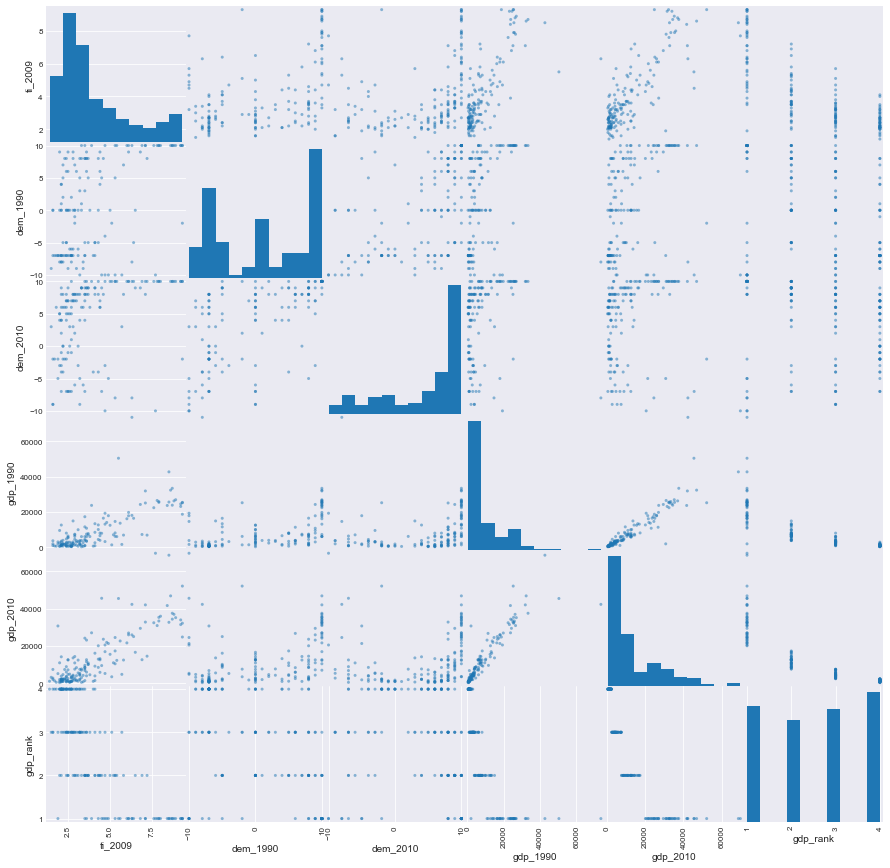

In [1693]:
# take a look at scatter matrix 
pd.plotting.scatter_matrix(ti_dem_gdp_merge_df,figsize=(15,15))


I used the scatter matrix to get some ideas of what to explore 

There is a positive correlation, but not perfect


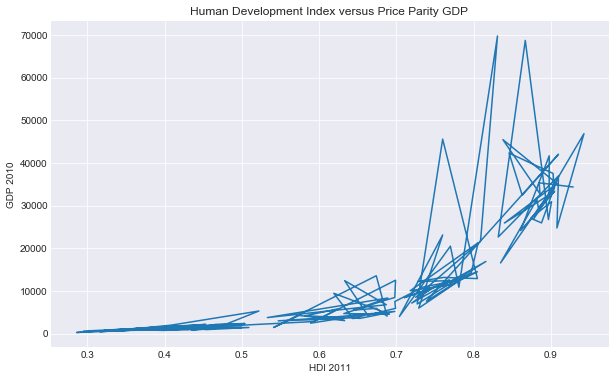

In [1694]:
gdp_hdi_merge_df = pd.merge(new_hdi_df, new_gdp_df, left_on = new_hdi_df['hdi_country'], right_on = new_gdp_df['gdp_country'])

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(gdp_hdi_merge_df['hdi_2011'],gdp_hdi_merge_df['gdp_2010'])
#ax.plot(merge_df['hdi_rank'])
plt.title('Human Development Index versus Price Parity GDP ')
plt.xlabel('HDI 2011') 
plt.ylabel('GDP 2010');
print("There is a positive correlation, but not perfect")
#ti_dem_merge_df.info()

I wanted to see if there as was a correlation between HDI and GDP.  I concluded that there was a pretty good correlation.  I decided that I would use GDP for further analysis because more countries have GDP figures.  If there would not have been a correlation, I would have done further exploration. 

There does show that higher HDI has a postiive coorelation with Price Parity GPP


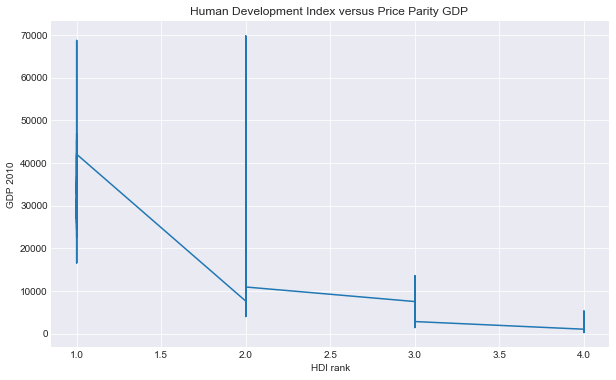

In [1695]:



fig, ax = plt.subplots(figsize = (10,6))
ax.plot(gdp_hdi_merge_df['hdi_rank'],gdp_hdi_merge_df['gdp_2010'])
plt.title('Human Development Index versus Price Parity GDP ')
plt.xlabel('HDI rank') 
plt.ylabel('GDP 2010');
print("There does show that higher HDI has a postiive coorelation with Price Parity GPP")
#ti_dem_merge_df.info()

Here I could see that there are ranges of GDP per capita dependent upon HDI rank.  Interesting, but this still did not influence how I was going to answer my original questions. 

There is not a correltation - surprising


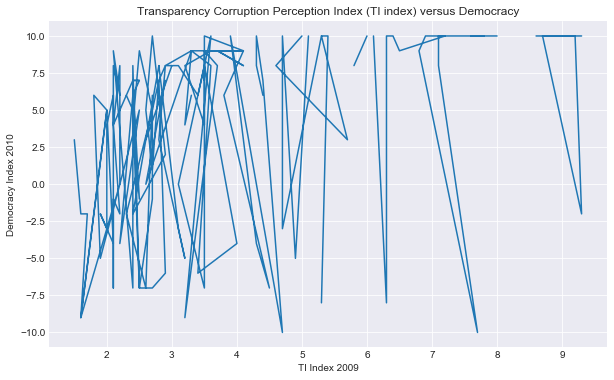

In [1696]:

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(ti_dem_gdp_merge_df['ti_2009'],ti_dem_gdp_merge_df['dem_2010'])
plt.title('Transparency Corruption Perception Index (TI index) versus Democracy')
plt.xlabel('TI Index 2009') 
plt.ylabel('Democracy Index 2010');
print("There is not a correltation - surprising")
#ti_dem_merge_df ti_2009 dem_2010

This was a surprise to me.  My thought was to digram the Democracy Index and Transparency International CPI.  I had expected a coorelation, but there was not a correlation.  This lead to me to the conclusion that I need to show the Democracy Index and Transparency International CPI seperately.  

In [1697]:
# I added aid to the transparency, democracy, and gdp statistic
# I did an outer join to look for different county spelling, this time I did not see corrections to be made
# One thought is that this covers a twentry year period so many post socialist countries will not be included 

aid_merge_df = pd.merge(ti_dem_gdp_merge_df, new_aid_df, left_on = ti_dem_gdp_merge_df['ti_country'], right_on = new_aid_df['aid_country'])
print('aid_merge_df',aid_merge_df.info())
print('aid_merge_df',aid_merge_df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 14 columns):
ti_country            104 non-null object
ti_2009               103 non-null float64
dem_country           94 non-null object
dem_1990              92 non-null float64
dem_2010              94 non-null float64
gdp_country           104 non-null object
gdp_1990              95 non-null float64
gdp_2010              104 non-null float64
gdp_rank              104 non-null int64
aid_country           104 non-null object
aid_1990              104 non-null float64
aid_2010              104 non-null float64
aid_1990_2010         104 non-null float64
aid_diff_1990_2010    104 non-null float64
dtypes: float64(9), int64(1), object(4)
memory usage: 12.2+ KB
aid_merge_df None
aid_merge_df   ti_country  ti_2009 dem_country  dem_1990  dem_2010 gdp_country  \
0    Uruguay      6.9     Uruguay      10.0      10.0     Uruguay   
1      Chile      7.2       Chile       8.0      10.0       Chile   
2 

I added aid to the transparency, democracy, and gdp statistic
I did an outer join to look for different county spelling, this time I did not see corrections to be made so after that I did an inner join. 
One thought is that this covers a twentry year period so many post socialist countries will not be included 

I merged with the hdi, but I will not use this merge for further analysis because many aid countries do not have hdis


In [1698]:

# I want to make some calculation from the 1990 data, so I am going to go through the data cleaning steps 
# for this dataframe

# 1) check for duplicates - there are not duplictes as expected 
print('duplicates',sum(aid_merge_df.duplicated()))
# 2) check for nulls and remove nulls, this is good for python but also for analysis, I do not want to analyze incomplete
# data, if the country does not have a democracy score I wnat to drop it  
print('look at nulls',aid_merge_df.info()) 
pd.isnull(aid_merge_df[['gdp_1990','gdp_2010']])
aid_merge_df = aid_merge_df[aid_merge_df['gdp_1990'].notnull()] # drop rows that have null 
aid_merge_df = aid_merge_df[aid_merge_df['gdp_2010'].notnull()] # drop rows that have null 
print(' after null removed: aid_merge_df.info',aid_merge_df.info()) # confirm that data types are float 
# 3) After dropping the nulls I noticed that I still had countries that did not have democracy indexes, I want 
# to have all the same countries for further analysis and operations 
drop_rows = aid_merge_df.query('ti_country != dem_country')
aid_merge_df.drop(drop_rows.index.values,inplace=True)
print('after nulls removed and countries without democracy indexes dropped',aid_merge_df.info())
print('after nulls removed and countries without democracy indexes dropped',aid_merge_df.head())
# 4) check for uniqueness, I expect that some of the value do repeat, I think the data is ok
print('uniqueness',aid_merge_df.nunique())

##print('new column names',new_hdi_df.head())

# 5) I want to make some new calculations
aid_merge_df['gdp_growth'] = ((aid_merge_df['gdp_2010'] - aid_merge_df['gdp_1990']) / aid_merge_df['gdp_1990']) * 100
aid_merge_df['dem_growth'] = aid_merge_df['dem_2010'] - aid_merge_df['dem_1990']
print('after calculation',aid_merge_df.head())
# 6) take a look at descriptive statistics, Equatorial Ghana really did have GDP growth of 1400%, I decided to drop
# it because of how it is such an exceptional outlier - oil was discovered 
aid_merge_df.drop([96],inplace=True)
print(aid_merge_df.describe())





duplicates 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 14 columns):
ti_country            104 non-null object
ti_2009               103 non-null float64
dem_country           94 non-null object
dem_1990              92 non-null float64
dem_2010              94 non-null float64
gdp_country           104 non-null object
gdp_1990              95 non-null float64
gdp_2010              104 non-null float64
gdp_rank              104 non-null int64
aid_country           104 non-null object
aid_1990              104 non-null float64
aid_2010              104 non-null float64
aid_1990_2010         104 non-null float64
aid_diff_1990_2010    104 non-null float64
dtypes: float64(9), int64(1), object(4)
memory usage: 12.2+ KB
look at nulls None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 103
Data columns (total 14 columns):
ti_country            95 non-null object
ti_2009               94 non-null float64
dem_country          


I want to make some calculation from the 1990 data, so I am going to go through the data cleaning steps 
for this dataframe

#1) check for duplicates - there are not duplictes as expected 

#2) check for nulls and remove nulls, this is good for python but also for analysis, I do not want to analyze incomplete
#data, if the country does not have a democracy score I want to drop it  

#3) After dropping the nulls I noticed that I still had countries that did not have democracy indexes, I want 
 to have all the same countries for further analysis and operations, I made a query and then did df.drop() 
drop_rows = aid_merge_df.query('ti_country != dem_country')
#4) check for uniqueness, I expect that some of the value do repeat, I think the data is ok

#5) I want to make some new calculations
aid_merge_df['gdp_growth'] = ((aid_merge_df['gdp_2010'] - aid_merge_df['gdp_1990']) / aid_merge_df['gdp_1990']) * 100
aid_merge_df['dem_growth'] = aid_merge_df['dem_2010'] - aid_merge_df['dem_1990']

#6) take a look at descriptive statistics, Equatorial Ghana really did have GDP growth of 1400%, I decided to drop
 it because of how it is such an exceptional outlier - oil was discovered. Then end result is that all columns did not have null values and Equiatorial Ghana was dropped





In [1699]:
# I make a new column 'aid_diff_rank' so that I can put in the countries ranking based on the median
# aid per capita increase 
aid_merge_df['aid_diff_rank'] = aid_merge_df['aid_diff_1990_2010']
print(aid_merge_df.head())
# I understood that I need to add the '.copy() from 
# https://stackoverflow.com/questions/42438987/dealing-with-settingwithcopywarning-when-assigning-columns-in-pandas
# I use a for loop to assign a rank of 4 to the countries with the lowest aid difference 
rank_4 = aid_merge_df[(aid_merge_df['aid_diff_1990_2010'] <= -14.26) & (aid_merge_df['aid_diff_1990_2010'] >= -143) ].copy()
print(rank_4)
print(rank_4.info())
count = -1 
for rank in rank_4['aid_diff_1990_2010']:
    count += 1
    rank_4.iloc[count,16] = 4
    #print (rank_4.iloc[count,4])
#print('rank4',rank_4)
# I use a for loop to assign a rank of 3 to the countries with a the aid difference just below the median
rank_3 = aid_merge_df[(aid_merge_df['aid_diff_1990_2010'] >= -14.26) & (aid_merge_df['aid_diff_1990_2010'] <= -1.53) ].copy()
count = -1 
for rank in rank_3['aid_diff_1990_2010']:
    count += 1
    rank_3.iloc[count,16] = 3
# I use a for loop to assign a rank of 2 to the countries with aid difference just above the median
rank_2 = aid_merge_df[(aid_merge_df['aid_diff_1990_2010'] <= 17.67) & (aid_merge_df['aid_diff_1990_2010'] >= -1.53) ].copy()
count = -1 
for rank in rank_2['aid_diff_1990_2010']:
    count += 1
    rank_2.iloc[count,16] = 2
# I use a for loop to assign a rank 1 to the countries with the highest aid difference 
rank_1 = aid_merge_df[(aid_merge_df['aid_diff_1990_2010'] <= 486.00) & (aid_merge_df['aid_diff_1990_2010'] >= 17.67) ].copy()
count = -1 
for rank in rank_1['aid_diff_1990_2010']:
    count += 1
    rank_1.iloc[count,16] = 1

# I concat the rankings and assign them back to the new_gdp_df
aid_merge_df = pd.concat([rank_1, rank_2,rank_3,rank_4])
#new_hdi_df_error = pd.concat([rank_1, rank_2,rank_3,rank_4])
# a quick check to see if it looks ok 
print('with ranking head',aid_merge_df.head(50))
print('with ranking tail',aid_merge_df.tail(75))
# take a look at the info, the rank column should not have nulls 
print('with ranking',aid_merge_df.info())
# take a look at the statistics, should not have changed except for the ranking, the ranking statistics 
# should also be logical (I have had to fix errors in my ranking for loops)
print('with ranking',aid_merge_df.describe())


  ti_country  ti_2009 dem_country  dem_1990  dem_2010 gdp_country  \
0    Uruguay      6.9     Uruguay      10.0      10.0     Uruguay   
1      Chile      7.2       Chile       8.0      10.0       Chile   
3   Botswana      5.8    Botswana       7.0       8.0    Botswana   
4       Oman      5.3        Oman     -10.0      -8.0        Oman   
5  Mauritius      5.4   Mauritius      10.0      10.0   Mauritius   

       gdp_1990     gdp_2010  gdp_rank aid_country    aid_1990   aid_2010  \
0   7301.477021  12641.94091         2     Uruguay   16.863282  13.915934   
1   6936.817686  14540.16023         2       Chile    7.851183  11.541638   
3   6948.157306  12462.61406         2    Botswana  105.051394  77.799840   
4  14661.580110  24559.00331         1        Oman   36.508561 -14.490905   
5   6104.291557  12283.21914         2   Mauritius   83.388822  97.796591   

   aid_1990_2010  aid_diff_1990_2010  gdp_growth  dem_growth  aid_diff_rank  
0      30.779215           -2.947348   73.14

with ranking          ti_2009   dem_1990   dem_2010      gdp_1990      gdp_2010   gdp_rank  \
count  87.000000  88.000000  88.000000     88.000000     88.000000  88.000000   
mean    3.126437  -0.818182   3.738636   3242.173214   5152.292511   3.147727   
std     1.113496   6.895852   5.312086   3048.612039   4980.585881   0.851500   
min     1.600000 -10.000000  -9.000000    355.408001    316.471524   1.000000   
25%     2.400000  -7.000000  -1.000000   1013.300483   1418.204484   2.750000   
50%     2.800000  -3.000000   6.000000   2018.789864   3539.593688   3.000000   
75%     3.500000   6.000000   8.000000   4122.949500   7588.304309   4.000000   
max     7.200000  10.000000  10.000000  14944.202710  24559.003310   4.000000   

         aid_1990    aid_2010  aid_1990_2010  aid_diff_1990_2010  gdp_growth  \
count   88.000000   88.000000      88.000000           88.000000   88.000000   
mean    56.726139   70.531742     127.257881           13.805603   59.014738   
std     55.765585

I will change this cell after I get feed back about how I propose to do rankings. 

In [1700]:
# I make a new column 'dem_growth_rank' so that I can put in the countries ranking based on the median
# aid per capita increase 
aid_merge_df['dem_growth_rank'] = aid_merge_df['dem_growth']
print(aid_merge_df.head())
# I understood that I need to add the '.copy() from 
# https://stackoverflow.com/questions/42438987/dealing-with-settingwithcopywarning-when-assigning-columns-in-pandas
# I use a for loop to assign a rank of 4 to the countries with the lowest aid difference 
rank_4 = aid_merge_df[(aid_merge_df['dem_growth'] <= 1.00) & (aid_merge_df['dem_growth'] >= -14.00) ].copy()
print(rank_4)
print(rank_4.info())
count = -1 
for rank in rank_4['dem_growth']:
    count += 1
    rank_4.iloc[count,17] = 4
    #print (rank_4.iloc[count,4])
#print('rank4',rank_4)
# I use a for loop to assign a rank of 3 to the countries with a the aid difference just below the median
rank_3 = aid_merge_df[(aid_merge_df['dem_growth'] >= 1.01) & (aid_merge_df['dem_growth'] <= 4.00) ].copy()
count = -1 
for rank in rank_3['dem_growth']:
    count += 1
    rank_3.iloc[count,17] = 3
# I use a for loop to assign a rank of 2 to the countries with aid difference just above the median
rank_2 = aid_merge_df[(aid_merge_df['dem_growth'] <= 8.00) & (aid_merge_df['dem_growth'] >= 4.01) ].copy()
count = -1 
for rank in rank_2['dem_growth']:
    count += 1
    rank_2.iloc[count,17] = 2
# I use a for loop to assign a rank 1 to the countries with the highest aid difference 
rank_1 = aid_merge_df[(aid_merge_df['dem_growth'] <= 17.00) & (aid_merge_df['dem_growth'] >= 8.01) ].copy()
count = -1 
for rank in rank_1['dem_growth']:
    count += 1
    rank_1.iloc[count,17] = 1

# I concat the rankings and assign them back to the new_gdp_df
aid_merge_df = pd.concat([rank_1, rank_2,rank_3,rank_4])
#new_hdi_df_error = pd.concat([rank_1, rank_2,rank_3,rank_4])
# a quick check to see if it looks ok 
print('with ranking head',aid_merge_df.head(50))
print('with ranking tail',aid_merge_df.tail(75))
# take a look at the info, the rank column should not have nulls 
print('with ranking',aid_merge_df.info())
# take a look at the statistics, should not have changed except for the ranking, the ranking statistics 
# should also be logical (I have had to fix errors in my ranking for loops)
print('with ranking',aid_merge_df.describe())


    ti_country  ti_2009 dem_country  dem_1990  dem_2010 gdp_country  \
7   Cape Verde      5.1  Cape Verde      -2.0      10.0  Cape Verde   
9       Bhutan      5.7      Bhutan     -10.0       3.0      Bhutan   
13     Namibia      4.4     Namibia       6.0       6.0     Namibia   
16       Ghana      4.1       Ghana      -7.0       8.0       Ghana   
20   Swaziland      3.2   Swaziland     -10.0      -9.0   Swaziland   

       gdp_1990     gdp_2010  gdp_rank aid_country    aid_1990    aid_2010  \
7   1426.675718  3473.944577         3  Cape Verde  302.385363  661.069881   
9   1679.156232  4780.116712         3      Bhutan   82.363474  180.455685   
13  3987.041447  5870.143478         3     Namibia   84.547260  112.311670   
16   907.100834  1478.462669         4       Ghana   37.835753   69.389648   
20  3894.183460  5341.501987         3   Swaziland   62.147502   86.640910   

    aid_1990_2010  aid_diff_1990_2010  gdp_growth  dem_growth  aid_diff_rank  \
7      963.455245       

with ranking tail                    ti_country  ti_2009               dem_country  dem_1990  \
45                      Niger      2.6                     Niger      -7.0   
51                  Indonesia      2.8                 Indonesia      -7.0   
75                 Bangladesh      2.4                Bangladesh      -5.0   
79                      Kenya      2.1                     Kenya      -7.0   
48                      Gabon      2.8                     Gabon      -6.0   
64                     Guyana      2.7                    Guyana      -7.0   
90              Guinea-Bissau      2.1             Guinea-Bissau      -8.0   
98                     Guinea      2.0                    Guinea      -7.0   
22               Burkina Faso      3.1              Burkina Faso      -7.0   
34                    Albania      3.3                   Albania       1.0   
36                    Liberia      3.3                   Liberia       0.0   
46                      Benin      2.8        

I will change this cell after I get feed back about how I propose to do rankings. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200C7D13400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000200CE8662B0>]], dtype=object)

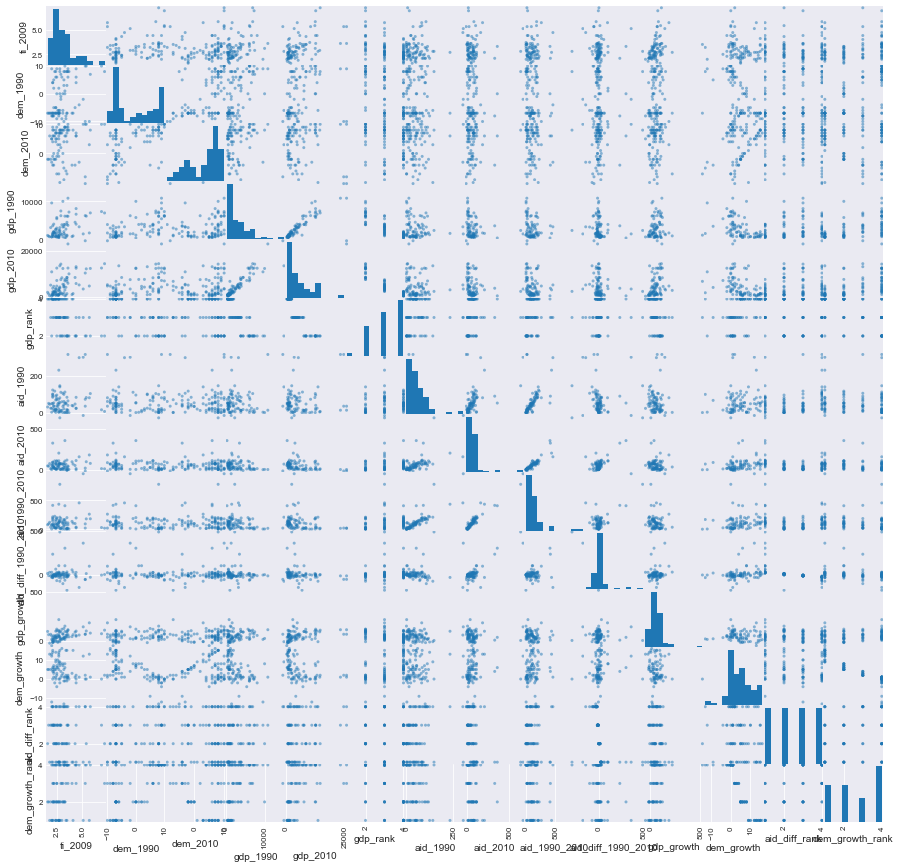

In [1701]:
pd.plotting.scatter_matrix(aid_merge_df,figsize=(15,15))

I used the scatter matrix to get some ideas for further exploration. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Is democracy good for business? (Economic Growth)

In [1702]:
print(ti_dem_gdp_merge_df.describe())

ti_dem_mean = ti_dem_gdp_merge_df.groupby('gdp_rank')[['ti_2009','dem_2010']].mean()
print(ti_dem_mean)


          ti_2009    dem_1990    dem_2010      gdp_1990      gdp_2010  \
count  165.000000  150.000000  152.000000    153.000000    167.000000   
mean     4.027879    0.806667    4.236842   8911.176986  12524.042738   
std      2.094871    7.135032    6.062300  10856.936790  13917.888566   
min      1.400000  -10.000000  -10.000000    355.408001    316.471524   
25%      2.500000   -7.000000   -1.000000   1679.156232   2209.032928   
50%      3.300000    0.000000    7.000000   4004.967556   7200.990669   
75%      5.000000    8.000000    9.000000  12692.581620  18734.418610   
max      9.300000   10.000000   10.000000  73501.526120  69797.940760   

         gdp_rank  
count  167.000000  
mean     2.556886  
std      1.149147  
min      1.000000  
25%      1.500000  
50%      3.000000  
75%      4.000000  
max      4.000000  
           ti_2009  dem_2010
gdp_rank                    
1         6.770732  6.055556
2         4.032432  6.305556
3         3.005000  2.583333
4         2.50212

I used this cell to get descriptive statistics and make some queries.  With the queries, I grouped the mean ti cpi and democracy index by 2010 gdp_rank. I then used this information to make my diagram.

ti cpi 2009 gdp_rank
1    6.770732
2    4.032432
3    3.005000
4    2.502128
Name: ti_2009, dtype: float64
dem_2009 gdp_rank
1    6.055556
2    6.305556
3    2.583333
4    2.409091
Name: dem_2010, dtype: float64


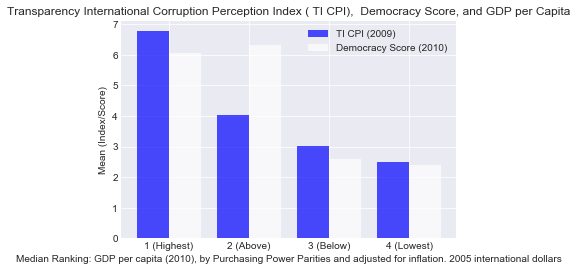

In [1703]:
# I got this from the udacity Portugal wine and modified it for gdp pp, democracy, and transparency international 
# corruption perception index analysis, kind of wild from wine to corruption!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')



blue_proportions = ti_dem_mean['ti_2009']
print('ti cpi 2009',blue_proportions)
white_proportions = ti_dem_mean['dem_2010']
print('dem_2009', white_proportions)
ind = np.arange(len(blue_proportions))   # the x locations for the groups
width = 0.40       # the width of the bars
# plot bars
red_bars = plt.bar(ind, blue_proportions, width, color='b', alpha=.7, label='TI CPI (2009)')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='Democracy Score (2010)')

# title and labels
plt.ylabel('Mean (Index/Score)')
plt.xlabel('Median Ranking: GDP per capita (2010), by Purchasing Power Parities and adjusted for inflation. 2005 international dollars')
plt.title('Transparency International Corruption Perception Index ( TI CPI),  Democracy Score, and GDP per Capita')
locations = ind + width / 2  # xtick locations
labels = ['1 (Highest)', '2 (Above)', '3 (Below)', '4 (Lowest)']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

You can see that higher average democracy and TI PI scores coorelate with higher gdp rankins.  In the conclusion, I will disucss this in more detail. 

### Research Question 2:  What is more important for Economic Growth: democracy or aid?

In [1704]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [1705]:
print('with ranking',aid_merge_df.describe())
print('mean growth group by aid diff rank', aid_merge_df.groupby('aid_diff_rank')[['gdp_growth']].mean())
print('mean percentage growth group by dem growth rank', aid_merge_df.groupby('dem_growth_rank')[['gdp_growth']].mean())
print('count by gdp_rank', aid_merge_df.groupby('gdp_rank')[['gdp_growth']].count())
# I want to calculation 20 year nominal GDP growth, still a negtive gpp growth with demoncracy growth
nom_aid_merge_df = aid_merge_df
nom_aid_merge_df['nom_growth'] = nom_aid_merge_df['gdp_2010'] - nom_aid_merge_df['gdp_1990']
print('mean nominal growth group by dem growth rank', aid_merge_df.groupby('dem_growth_rank')[['nom_growth']].mean())
mean_aid_gdp_growth = aid_merge_df.groupby('aid_diff_rank')[['gdp_growth']].mean()
mean_dem_gdp_growth = aid_merge_df.groupby('dem_growth_rank')[['gdp_growth']].mean()



with ranking          ti_2009   dem_1990   dem_2010      gdp_1990      gdp_2010   gdp_rank  \
count  87.000000  88.000000  88.000000     88.000000     88.000000  88.000000   
mean    3.126437  -0.818182   3.738636   3242.173214   5152.292511   3.147727   
std     1.113496   6.895852   5.312086   3048.612039   4980.585881   0.851500   
min     1.600000 -10.000000  -9.000000    355.408001    316.471524   1.000000   
25%     2.400000  -7.000000  -1.000000   1013.300483   1418.204484   2.750000   
50%     2.800000  -3.000000   6.000000   2018.789864   3539.593688   3.000000   
75%     3.500000   6.000000   8.000000   4122.949500   7588.304309   4.000000   
max     7.200000  10.000000  10.000000  14944.202710  24559.003310   4.000000   

         aid_1990    aid_2010  aid_1990_2010  aid_diff_1990_2010  gdp_growth  \
count   88.000000   88.000000      88.000000           88.000000   88.000000   
mean    56.726139   70.531742     127.257881           13.805603   59.014738   
std     55.765585

#I wanted to look at the aid_merge_df.describe() to get a general idea about the aid statistics:
print('with ranking',aid_merge_df.describe())

#I groupted average gdp growth percentage by aid_diff_rank (ranking of aid received)
print('mean growth group by aid diff rank', aid_merge_df.groupby('aid_diff_rank')[['gdp_growth']].mean())

#I then grouped gdp growth percentabe by dem_growth_rank (ranking of democracy improvement
print('mean percentage growth group by dem growth rank', aid_merge_df.groupby('dem_growth_rank')[['gdp_growth']].mean())

#I was surprised by the visualization so I was curious is I looked at the mena of nominal gdp growth 
nom_aid_merge_df = aid_merge_df
nom_aid_merge_df['nom_growth'] = nom_aid_merge_df['gdp_2010'] - nom_aid_merge_df['gdp_1990']
print('mean nominal growth group by dem growth rank', aid_merge_df.groupby('dem_growth_rank')[['nom_growth']].mean())




mean gdp growth grouped by aid rank aid_diff_rank
1.0    54.198674
2.0    86.798771
3.0    44.444966
4.0    50.616539
Name: gdp_growth, dtype: float64


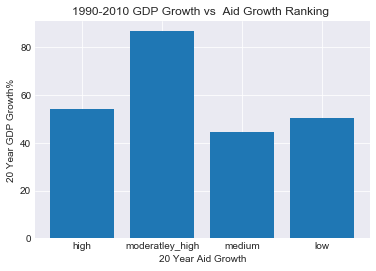

In [1706]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# I got this from the udacity Portugal wine and modified it for gdp and aid growth

highest            =  mean_aid_gdp_growth['gdp_growth'].iloc[0]
above              =  mean_aid_gdp_growth['gdp_growth'].iloc[1]
below              =  mean_aid_gdp_growth['gdp_growth'].iloc[2]
lowest             =  mean_aid_gdp_growth['gdp_growth'].iloc[3]

print('mean gdp growth grouped by aid rank',mean_aid_gdp_growth['gdp_growth'])

locations = [1, 2, 3, 4]
heights = [highest, above, below,lowest]
labels = ['high', 'moderatley_high', 'medium', 'low']
bins = [0,1,2,3]
plt.bar(locations, heights, tick_label=labels)
plt.title('1990-2010 GDP Growth vs  Aid Growth Ranking ')
plt.xlabel('20 Year Aid Growth') 
plt.ylabel('20 Year GDP Growth%');

I really had no idea if aid influence GDP growth.  One would intuitively feel that aid growth should help economic growth.  But from this diagram, you can see that there is not a correlation.

mean gdp growth grouped by democracy rank dem_growth_rank
1.0    49.026778
2.0    39.248836
3.0    55.821127
4.0    79.937915
Name: gdp_growth, dtype: float64


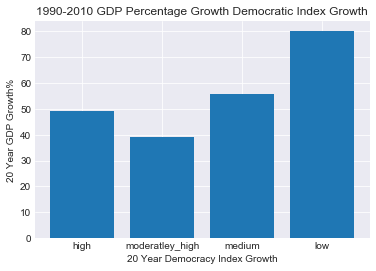

In [1707]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# I got this from the udacity Portugal wine and modified it for gdp and aid growth

highest            =  mean_dem_gdp_growth['gdp_growth'].iloc[0]
above              =  mean_dem_gdp_growth['gdp_growth'].iloc[1]
below              =  mean_dem_gdp_growth['gdp_growth'].iloc[2]
lowest             =  mean_dem_gdp_growth['gdp_growth'].iloc[3]

#lowest,below,above,highest
print('mean gdp growth grouped by democracy rank',mean_dem_gdp_growth['gdp_growth'])

locations = [1, 2, 3, 4]
heights = [highest, above, below,lowest]
labels = ['high', 'moderatley_high', 'medium', 'low']
bins = [0,1,2,3]
plt.bar(locations, heights, tick_label=labels)
plt.title('1990-2010 GDP Percentage Growth Democratic Index Growth')
plt.xlabel('20 Year Democracy Index Growth') 
plt.ylabel('20 Year GDP Growth%');

I was surprised with this. It looks like that democractic growth is bad for GDP growth. In the conclusion, I will discuss why this is. 

             ti_country  ti_2009          dem_country  dem_1990  dem_2010  \
7            Cape Verde      5.1           Cape Verde      -2.0      10.0   
9                Bhutan      5.7               Bhutan     -10.0       3.0   
67           Mozambique      2.7           Mozambique      -7.0       5.0   
70               Uganda      2.5               Uganda      -7.0      -1.0   
72              Lebanon      2.5              Lebanon       0.0       7.0   
1                 Chile      7.2                Chile       8.0      10.0   
44   Dominican Republic      3.0   Dominican Republic       6.0       8.0   
61              Vietnam      2.7              Vietnam      -7.0      -7.0   
5             Mauritius      5.4            Mauritius      10.0      10.0   
23                China      3.5                China      -7.0      -7.0   
27                India      3.3                India       8.0       9.0   
21  Trinidad and Tobago      3.6  Trinidad and Tobago       9.0      10.0   

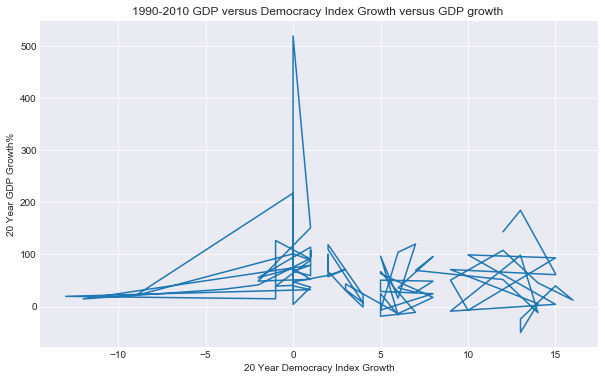

In [1708]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


fig, ax = plt.subplots(figsize = (10,6))
ax.plot(aid_merge_df['dem_growth'],aid_merge_df['gdp_growth'])
plt.title('1990-2010 GDP versus Democracy Index Growth versus GDP growth ')
plt.xlabel('20 Year Democracy Index Growth') 
plt.ylabel('20 Year GDP Growth%')
print(aid_merge_df.query('gdp_growth > 100'));

This diagram shows that there is not a correlation between GDP Growth and Democracy Index growth. I made a query of countries that had growth greater than 100%. I talk about this more in my conclusions. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

ti cpi 2009 gdp_rank
1    6.770732
2    4.032432
3    3.005000
4    2.502128
Name: ti_2009, dtype: float64
dem_2009 gdp_rank
1    6.055556
2    6.305556
3    2.583333
4    2.409091
Name: dem_2010, dtype: float64


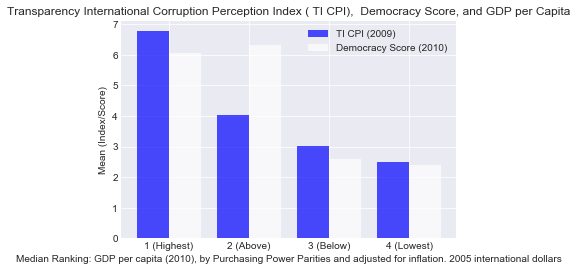

In [1709]:
# I got this from the udacity Portugal wine and modified it for gdp pp, democracy, and transparency international 
# corruption perception index analysis, kind of wild from wine to corruption!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')



blue_proportions = ti_dem_mean['ti_2009']
print('ti cpi 2009',blue_proportions)
white_proportions = ti_dem_mean['dem_2010']
print('dem_2009', white_proportions)
ind = np.arange(len(blue_proportions))   # the x locations for the groups
width = 0.40       # the width of the bars
# plot bars
red_bars = plt.bar(ind, blue_proportions, width, color='b', alpha=.7, label='TI CPI (2009)')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='Democracy Score (2010)')

# title and labels
plt.ylabel('Mean (Index/Score)')
plt.xlabel('Median Ranking: GDP per capita (2010), by Purchasing Power Parities and adjusted for inflation. 2005 international dollars')
plt.title('Transparency International Corruption Perception Index ( TI CPI),  Democracy Score, and GDP per Capita')
locations = ind + width / 2  # xtick locations
labels = ['1 (Highest)', '2 (Above)', '3 (Below)', '4 (Lowest)']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

I put the diagrams into the Jupyter cell.  It looks great in the Jupyter cell but disappers when saving as a HTML or printing a PDF. Maybe there is another way to do this. 



**1) Is democracy good for business? (Economic Growth)** 


**Definitions:** 

**GDP per capita**, by Purchasing Power Parities and adjusted for inflation. 2005 international dollars. In simple English, McDonalds Big Macs cost differently in different countries. This Excel contains in 2005 dollars how many Big Macs you could buy in your own country - this means that some countries have a higher GPD Purchasing Power Parity then their nominal GDP and also the oppositie.

**Democracy Score** - Overall polity score from the Polity IV dataset, calculated by subtracting an autocracy score from a democracy score. It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.

For the purpose of the **Transparency International Corruption Perception Index ( TI CPI)**, how is corruption defined?
The CPI focuses on corruption in the public sector. The surveys used in compiling the CPI ask questions relating to the abuse of public power for private benefit. These include questions on: bribery of public officials, kickbacks in public procurement, embezzlement of public funds, and questions that probe the strength and effectiveness of public sector anti-corruption efforts, thereby covering both the administrative and political aspects of corruption. Why is the CPI based only on perceptions?
It is difficult to assess the overall levels of corruption in different countries/territories based on hard empirical data, e.g. by comparing the amount of bribes or the number of prosecutions or court cases directly related to corruption. In the latter case, for example, such data does not reflect actual levels of corruption; rather it highlights the extent to which prosecutors, courts and/or the media are effectively investigating and exposing corruption. One reliable method of compiling cross-country data is, therefore, to draw on the experience and perceptions of those who see first hand the realities of corruption in a country. **In simple English, a higher score means less corruption while a lower score means more corruption**

**Data Analysis Scope:** 
The data analysis was done for countries that had 2010 Democracy scores, 2009 Transparency International Corruption Perception Indexes (TI CPI), and GDP per capita (2010). There were 178 countries with GDP per capita data.  The data analysis was performed for 167 countries that had TI CPI indexes while 152 had Democracy scores. The 15 countries that did not have Democracy scores may have increased or reduced the mean Democracy score for the GDP rank. This analysis cannot be used for prediction purposes, but can be used for further research ideas. 



**Conclusions:**

In my Transparency International Corruption Perception Index ( TI CPI),  Democracy Score, and GDP per Capita digram, I used GDP per capita (2010), by Purchasing Power Parities and adjusted for inflation. 2005 international dollars (GDP per capita) as a proxy for economic growth.  In my data exploration and wrangling, I looked at the Human Development Index and GDP per Capita and found a visual correlation.  I also looked for a visual correlation between the Transparency International Corruption Perception Index ( TI CPI) and Democracy Score – I was surprised that there was no correlation.  This is why I decided to show data separately for TI CPI and the Democracy Score.   When I did my data wrangling, I ranked GDP per capita by median.  The  Highest median is the top 25% of countries, the Above median is the countries between the median and the top 75%, the Below median is countries between the median and the bottom 25%, and Lowest is bottom 25% of countries.

My diagram shows that Democracy is good for business, but with a caveat. Democracy helps countries get over the median.  But to become wealthy (top 25% of countries), corruption needs to be reduced (higher TI CPI).   From the diagram it looks like not only innovation is needed to escape the middle income trap. 
When giving aid, it seems that improving democracy and less corruption should be among the priorities. 
 


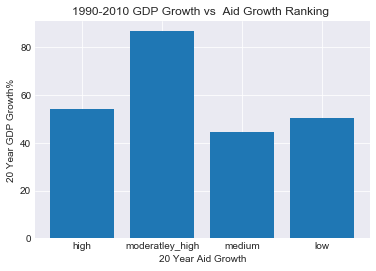

In [1710]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# I got this from the udacity Portugal wine and modified it for gdp and aid growth

highest            =  mean_aid_gdp_growth['gdp_growth'].iloc[0]
above              =  mean_aid_gdp_growth['gdp_growth'].iloc[1]
below              =  mean_aid_gdp_growth['gdp_growth'].iloc[2]
lowest             =  mean_aid_gdp_growth['gdp_growth'].iloc[3]

#lowest,below,above,highest

locations = [1, 2, 3, 4]
heights = [highest, above, below,lowest]
labels = ['high', 'moderatley_high', 'medium', 'low']
bins = [0,1,2,3]
plt.bar(locations, heights, tick_label=labels)
plt.title('1990-2010 GDP Growth vs  Aid Growth Ranking ')
plt.xlabel('20 Year Aid Growth') 
plt.ylabel('20 Year GDP Growth%');

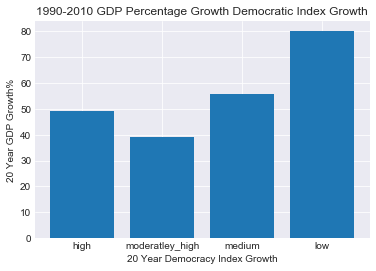

In [1711]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# I got this from the udacity Portugal wine and modified it for gdp and aid growth

highest            =  mean_dem_gdp_growth['gdp_growth'].iloc[0]
above              =  mean_dem_gdp_growth['gdp_growth'].iloc[1]
below              =  mean_dem_gdp_growth['gdp_growth'].iloc[2]
lowest             =  mean_dem_gdp_growth['gdp_growth'].iloc[3]

#lowest,below,above,highest

locations = [1, 2, 3, 4]
heights = [highest, above, below,lowest]
labels = ['high', 'moderatley_high', 'medium', 'low']
bins = [0,1,2,3]
plt.bar(locations, heights, tick_label=labels)
plt.title('1990-2010 GDP Percentage Growth Democratic Index Growth')
plt.xlabel('20 Year Democracy Index Growth') 
plt.ylabel('20 Year GDP Growth%');

**2) What is more important for Economic Growth: democracy or aid?**


**Definition:**
Aid net official development assistance (ODA) per capita consists of disbursements of loans made on concessional terms (net of repayments of principal) and grants by official agencies of the members of the Development Assistance Committee (DAC), by multilateral institutions, and by non-DAC countries to promote economic development and welfare in countries and territories in the DAC list of ODA recipients; and is calculated by dividing net ODA received by the midyear population estimate. It includes loans with a grant element of at least 25 percent (calculated at a rate of discount of 10 percent).
In simple English - how much a person received in a country received aid in 2010 dollars.

**Data Analysis Scope:**
The data analysis was done for countries that had 2010 Democracy scores, 2009 Transparency International Corruption Perception Indexes (TI CPI), and GDP per capita (2010). There were 178 countries with GDP per capita data.  The GDP per capita (2010) country data was matched to the Aid net official development assistance (ODA)  2010 data and to the 2010 Democracy scores.  There were 89 countries that had received aid and had Democracy scores. Equatorial Ghana was dropped because it had GDP growth of 1 400% and was a definite statistical outlier.  Therefore, the number of countries analyzed was 88.   This analysis cannot be used for prediction purposes, but can be used for further research ideas.



**Conclusions:**
The 1990-2010 GDP Growth vs  Aid Growth Ranking diagram shows the countries that received the most growth aid per capita to the least growth (actually aid per capita reductions) aid per capita.  As you can see there is no co-relation between aid per capita and GDP growth per capita. 

The 1990-2010 GDP Percentage Growth Democratic Index Growth diagram shows the countries with the most improved Democratic index to the countries with the least. The results surprised me – it looks like less Democratic improvements resulted in more growth. 

Three countries with very large growth are: China, India, and Vietnam.  These countries did not have large Democratic index improvements, and this partly explains the surprising data. One can understand that development aid economics is not straight forward.  From the Transparency International (TI) Corruption Perception Index (CPI),  Democracy Score, and GDP per Capita diagram, one can see that Democracy and less corruption aid economic development.  The question is how to work together with less developed countries.  It looks to be country specific. 




from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])